Total documents processed: 19
Total pages processed: 587
Total images extracted: 241
Total tables extracted: 98
Total nougat images processed: 512
Total processing time: 1180.22 seconds

Average pages per document: 30.89
Average images per document: 12.68
Average tables per document: 5.16
Average processing time per document: 62.12 seconds
Average processing time per page: 2.01 seconds

Cost Analysis:
Total GPU Cost (USD): $0.3147
Total Postprocessing Cost (USD): $3.3900
Total Azure Document Intelligence Cost (USD): $0.5870
Total Summarization Cost (USD): $0.9500
Total Cost (USD): $5.2417
Average Cost per Document (USD): $0.2759
Average Cost per Page (USD): $0.0089
Estimated Nougat Processing Percentage (%): $139.7223
Estimated Nougat GPU Cost (USD): $0.4397


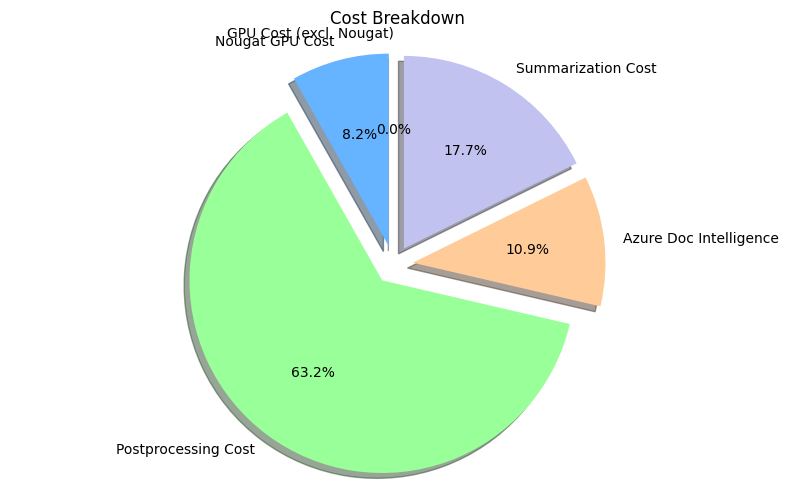

<Figure size 1200x800 with 0 Axes>

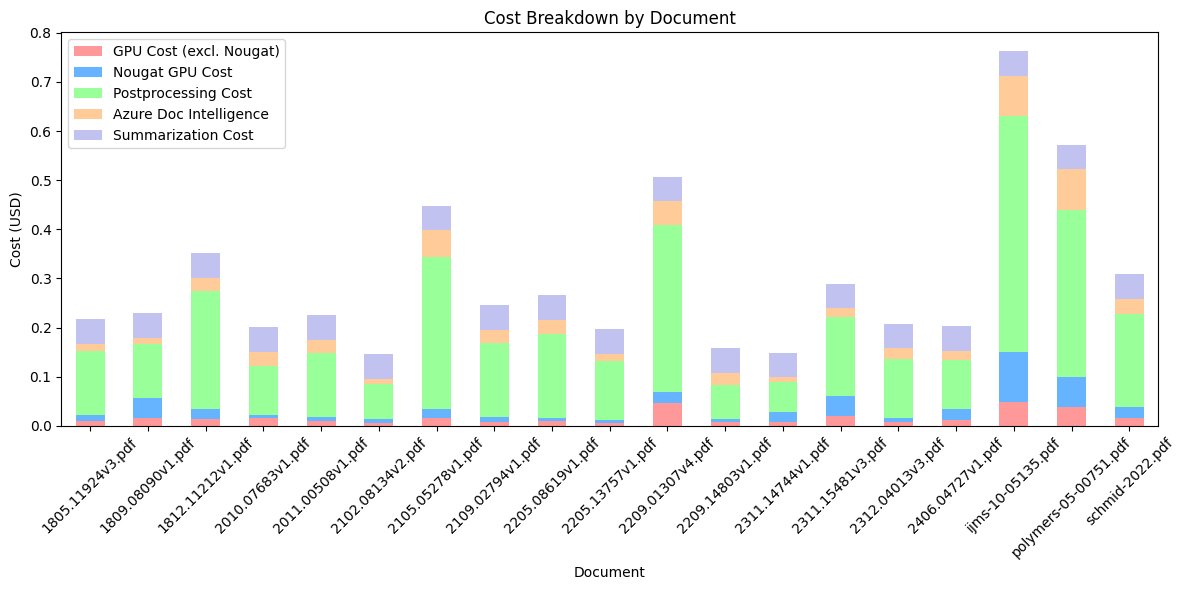

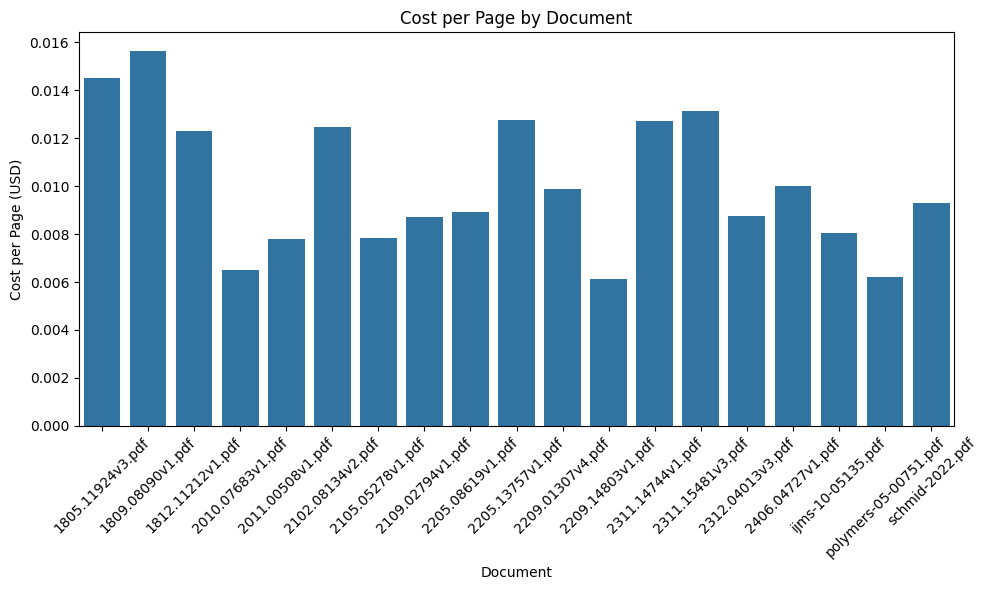

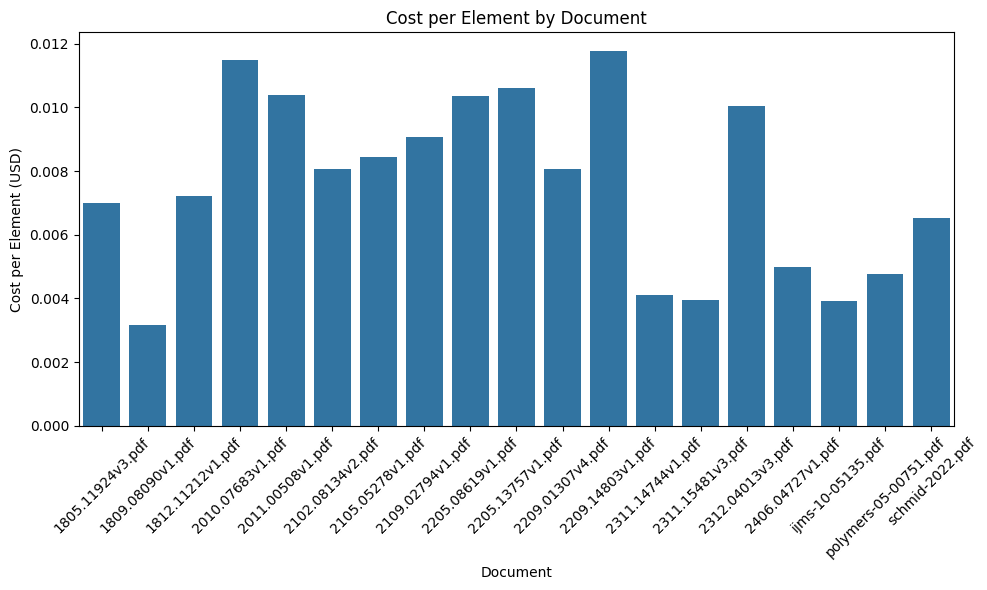

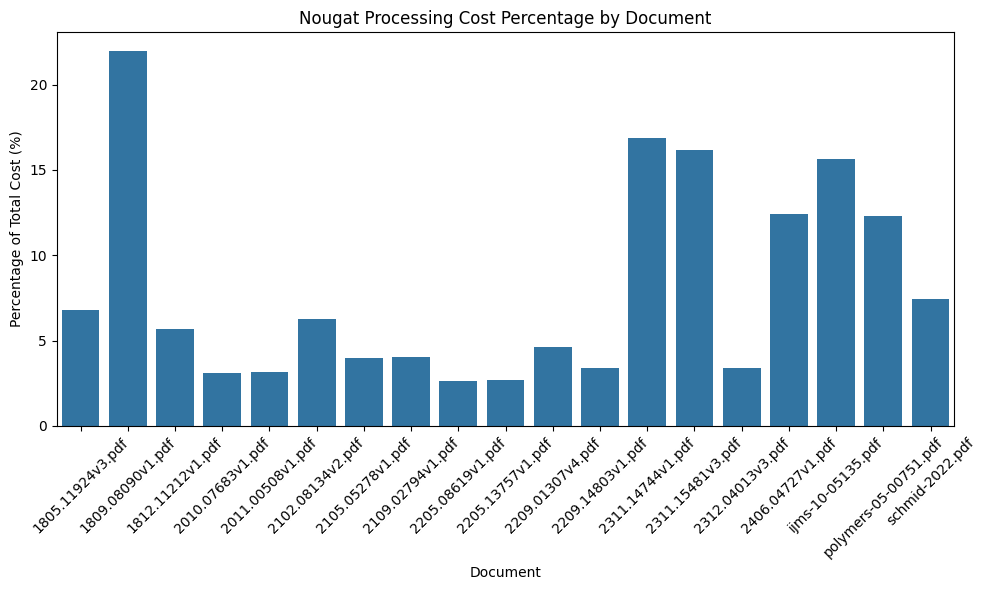


Cost Optimization Recommendations:
1. The average cost per page is $0.0089
2. Nougat image processing accounts for 139.7% of the total processing time
3. The most cost-effective document was: 2209.14803v1.pdf at $0.0061 per page
4. The least cost-effective document was: 1809.08090v1.pdf at $0.0156 per page

Projected Costs for Larger Datasets:
   Number of Documents  Projected Processing Time (hours)  \
0                   10                           0.172546   
1                   50                           0.862731   
2                  100                           1.725463   
3                  500                           8.627313   
4                 1000                          17.254626   

   Projected Cost (USD)  
0              2.758802  
1             13.794012  
2             27.588023  
3            137.940115  
4            275.880231  


In [19]:
def evaluate_pipeline_efficiency(json_path, gpu_cost_per_hour=0.96, 
                                postprocessing_cost_per_item=0.01,
                                azure_doc_intell_cost_per_page=0.001,
                                summarization_cost_per_document=0.05):  # Added parameter for summarization cost
    """
    Evaluate pipeline efficiency and costs based on processing data
    
    Parameters:
    -----------
    json_path: str or Path
        Path to the combined_report.json file
    gpu_cost_per_hour: float
        Cost per hour for GPU usage in USD
    postprocessing_cost_per_item: float
        Cost per processed item (image or table) in USD
    azure_doc_intell_cost_per_page: float
        Azure Document Intelligence cost per page in USD
    summarization_cost_per_document: float
        Cost for summarization per document in USD
    """
    # Load processing data
    with open(json_path) as f:
        report_data = json.load(f)
    
    # Extract the documents array for document-level analysis
    documents_df = pd.DataFrame(report_data["documents"])
    
    # Use existing summary data from the JSON where available
    total_documents = report_data.get("total_documents", len(documents_df))
    total_pages = report_data.get("total_pages", documents_df['pages'].sum())
    total_images = report_data.get("total_images", documents_df['images'].sum())
    total_tables = report_data.get("total_tables", documents_df['tables'].sum())
    total_nougat_images = report_data.get("total_nougat_images", documents_df['nougat_images'].sum())
    total_time_seconds = report_data.get("total_time_seconds", documents_df['processing_time_seconds'].sum())
    
    # Print basic processing statistics
    print(f"Total documents processed: {total_documents}")
    print(f"Total pages processed: {total_pages}")
    print(f"Total images extracted: {total_images}")
    print(f"Total tables extracted: {total_tables}")
    print(f"Total nougat images processed: {total_nougat_images}")
    print(f"Total processing time: {total_time_seconds:.2f} seconds")
    
    # Calculate averages or use pre-computed values
    avg_pages_per_document = report_data.get("avg_pages_per_document", total_pages / total_documents)
    avg_images_per_document = report_data.get("avg_images_per_document", total_images / total_documents)
    avg_tables_per_document = report_data.get("avg_tables_per_document", total_tables / total_documents)
    avg_processing_time_per_document = report_data.get("avg_processing_time_per_document", 
                                                      total_time_seconds / total_documents)
    avg_processing_time_per_page = report_data.get("avg_processing_time_per_page", 
                                                  total_time_seconds / total_pages)
    
    print(f"\nAverage pages per document: {avg_pages_per_document:.2f}")
    print(f"Average images per document: {avg_images_per_document:.2f}")
    print(f"Average tables per document: {avg_tables_per_document:.2f}")
    print(f"Average processing time per document: {avg_processing_time_per_document:.2f} seconds")
    print(f"Average processing time per page: {avg_processing_time_per_page:.2f} seconds")
    
    # Cost Analysis
    # Calculate processing time in hours
    total_processing_time_hours = total_time_seconds / 3600
    
    # Calculate GPU cost
    total_gpu_cost = total_processing_time_hours * gpu_cost_per_hour
    
    # Calculate postprocessing cost for images and tables
    total_postprocessing_cost = (total_images + total_tables) * postprocessing_cost_per_item
    
    # Calculate Azure Document Intelligence cost
    total_azure_doc_cost = total_pages * azure_doc_intell_cost_per_page
    
    # Calculate summarization cost
    total_summarization_cost = total_documents * summarization_cost_per_document
    
    # Calculate total cost
    total_cost = total_gpu_cost + total_postprocessing_cost + total_azure_doc_cost + total_summarization_cost
    
    # Calculate average costs
    avg_cost_per_document = total_cost / total_documents
    avg_cost_per_page = total_cost / total_pages
    
    # Estimated nougat image processing time
    if 'processing_time_per_nougat_image' not in documents_df.columns:
        # Calculate if not present
        documents_df['processing_time_per_nougat_image'] = documents_df.apply(
            lambda row: row['processing_time_seconds'] / row['nougat_images'] if row['nougat_images'] > 0 else 0, 
            axis=1
        )
    
    avg_time_per_nougat_image = documents_df['processing_time_per_nougat_image'].mean()
    estimated_nougat_processing_time = total_nougat_images * avg_time_per_nougat_image
    nougat_processing_percentage = (estimated_nougat_processing_time / total_time_seconds) * 100 if total_time_seconds > 0 else 0
    estimated_nougat_gpu_cost = (estimated_nougat_processing_time / 3600) * gpu_cost_per_hour
    
    # Calculate costs per document
    documents_df['processing_time_hours'] = documents_df['processing_time_seconds'] / 3600
    documents_df['gpu_cost'] = documents_df['processing_time_hours'] * gpu_cost_per_hour
    documents_df['postprocessing_cost'] = (documents_df['images'] + documents_df['tables']) * postprocessing_cost_per_item
    documents_df['azure_doc_cost'] = documents_df['pages'] * azure_doc_intell_cost_per_page
    documents_df['summarization_cost'] = summarization_cost_per_document  # Add summarization cost per document
    documents_df['total_cost'] = documents_df['gpu_cost'] + documents_df['postprocessing_cost'] + documents_df['azure_doc_cost'] + documents_df['summarization_cost']
    documents_df['cost_per_page'] = documents_df['total_cost'] / documents_df['pages']
    
    # Estimated nougat processing cost per document
    documents_df['estimated_nougat_processing_time'] = documents_df['nougat_images'] * avg_time_per_nougat_image
    documents_df['estimated_nougat_processing_percentage'] = (documents_df['estimated_nougat_processing_time'] / documents_df['processing_time_seconds']) * 100
    documents_df['estimated_nougat_gpu_cost'] = (documents_df['estimated_nougat_processing_time'] / 3600) * gpu_cost_per_hour
    
    # Display cost metrics
    cost_metrics = {
        'Total GPU Cost (USD)': total_gpu_cost,
        'Total Postprocessing Cost (USD)': total_postprocessing_cost,
        'Total Azure Document Intelligence Cost (USD)': total_azure_doc_cost,
        'Total Summarization Cost (USD)': total_summarization_cost,  # Include summarization cost in the output
        'Total Cost (USD)': total_cost,
        'Average Cost per Document (USD)': avg_cost_per_document,
        'Average Cost per Page (USD)': avg_cost_per_page,
        'Estimated Nougat Processing Percentage (%)': nougat_processing_percentage,
        'Estimated Nougat GPU Cost (USD)': estimated_nougat_gpu_cost
    }
    
    print("\nCost Analysis:")
    for metric, value in cost_metrics.items():
        print(f"{metric}: ${value:.4f}")
    
    # Plot cost breakdown
    plt.figure(figsize=(10, 6))
    labels = ['GPU Cost (excl. Nougat)', 'Nougat GPU Cost', 'Postprocessing Cost', 'Azure Doc Intelligence', 'Summarization Cost']
    sizes = [
        total_gpu_cost - estimated_nougat_gpu_cost, 
        estimated_nougat_gpu_cost, 
        total_postprocessing_cost,
        total_azure_doc_cost,
        total_summarization_cost  # Add summarization cost to the pie chart
    ]
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
    explode = (0.1, 0.1, 0.1, 0.1, 0.1)
    
    sizes = np.maximum(0, sizes)
    
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.title('Cost Breakdown')
    plt.show()
    
    # Plot cost by document
    plt.figure(figsize=(12, 8))
    documents_df[['gpu_cost', 'estimated_nougat_gpu_cost', 'postprocessing_cost', 'azure_doc_cost', 'summarization_cost']].plot(
        kind='bar', stacked=True,
        color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'],
        figsize=(12, 6)
    )
    plt.title('Cost Breakdown by Document')
    plt.xlabel('Document')
    plt.ylabel('Cost (USD)')
    plt.xticks(range(len(documents_df)), documents_df['document_name'], rotation=45)
    plt.legend(['GPU Cost (excl. Nougat)', 'Nougat GPU Cost', 'Postprocessing Cost', 'Azure Doc Intelligence', 'Summarization Cost'])
    plt.tight_layout()
    plt.show()
    
    # Plot cost per page by document
    plt.figure(figsize=(10, 6))
    sns.barplot(x='document_name', y='cost_per_page', data=documents_df)
    plt.title('Cost per Page by Document')
    plt.xlabel('Document')
    plt.ylabel('Cost per Page (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Calculate cost efficiency metrics
    documents_df['cost_per_element'] = documents_df['total_cost'] / (documents_df['images'] + documents_df['tables'] + documents_df['nougat_images'])
    documents_df['nougat_cost_percentage'] = (documents_df['estimated_nougat_gpu_cost'] / documents_df['total_cost']) * 100
    
    # Display cost efficiency metrics
    plt.figure(figsize=(10, 6))
    sns.barplot(x='document_name', y='cost_per_element', data=documents_df)
    plt.title('Cost per Element by Document')
    plt.xlabel('Document')
    plt.ylabel('Cost per Element (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='document_name', y='nougat_cost_percentage', data=documents_df)
    plt.title('Nougat Processing Cost Percentage by Document')
    plt.xlabel('Document')
    plt.ylabel('Percentage of Total Cost (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Find optimal batch size and processing strategies
    print("\nCost Optimization Recommendations:")
    print("1. The average cost per page is ${:.4f}".format(avg_cost_per_page))
    print("2. Nougat image processing accounts for {:.1f}% of the total processing time".format(nougat_processing_percentage))
    
    if len(documents_df) > 0:  # Safety check to prevent IndexError
        print("3. The most cost-effective document was: {} at ${:.4f} per page".format(
            documents_df.loc[documents_df['cost_per_page'].idxmin(), 'document_name'],
            documents_df['cost_per_page'].min()
        ))
        print("4. The least cost-effective document was: {} at ${:.4f} per page".format(
            documents_df.loc[documents_df['cost_per_page'].idxmax(), 'document_name'],
            documents_df['cost_per_page'].max()
        ))
    
    # Calculate the projected costs for processing larger datasets
    projected_costs = pd.DataFrame({
        'Number of Documents': [10, 50, 100, 500, 1000],
        'Projected Processing Time (hours)': [total_processing_time_hours * n / total_documents for n in [10, 50, 100, 500, 1000]],
        'Projected Cost (USD)': [total_cost * n / total_documents for n in [10, 50, 100, 500, 1000]]
    })
    
    print("\nProjected Costs for Larger Datasets:")
    print(projected_costs)
    
    # Return the data for further analysis if needed
    return {
        'documents_df': documents_df,
        'cost_metrics': cost_metrics,
        'projected_costs': projected_costs
    }

# Example usage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# Set the path to your combined_report.json file
json_path = Path('combined_report.json')

# Set the cost parameters
gpu_cost_per_hour = 0.96  # USD/hour
postprocessing_cost_per_item = 0.01  # USD per image or table
azure_doc_intell_cost_per_page = 0.001  # USD per page
summarization_cost_per_document = 0.05  # USD per document

# Run the evaluation
results = evaluate_pipeline_efficiency(
    json_path,
    gpu_cost_per_hour,
    postprocessing_cost_per_item,
    azure_doc_intell_cost_per_page,
    summarization_cost_per_document
)